In [ ]:
# API STANDS FOR APPLICATION PROGRAM INTERFACE ACT AS A INTERMEDIARY BETWEEN TWO APLLICATION THAT WAN'T TO TALK

#API HAS TYPICALLY A CLIENT AND A SERVER. THE APPLICATION OR THE PERSON SUBMITTING THE REQUEST THAT IS THE CLIENT AND SERVER IS THE APLLICATION THAT IS SENDING RESPONSE TO THAT

#API IS BRIGDE BETWEEN USER AND COMPANY DATA 

In [25]:
# API TEST NOTEBOOK
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8995da26-d1cd-40e7-a186-11b8a1bb98da',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-06-27T05:52:01.706Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 10102}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11137, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [45]:
import pandas as pd


#This allows you to see all the columns instead of(1 ... last), not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
#This normalizes the data and makes it all pretty in a dataframe

pd.json_normalize(data['status'])
#pd.json_normalize(data['data'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-06-27T05:52:01.706Z,0,None,25,1,None,10102


In [28]:
df=pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11137,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971767e+07,1.971767e+07,False,NaN,1,NaN,NaN,None,2024-06-27T05:51:00.000Z,60899.033656,2.162111e+10,-21.7334,-0.302351,-1.198767,-6.906633,-10.234496,-4.613283,-13.290619,1.200787e+12,53.3678,1.278880e+12,None,2024-06-27T05:51:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9102,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201784e+08,1.201784e+08,True,NaN,2,NaN,NaN,None,2024-06-27T05:50:00.000Z,3371.922687,1.143781e+10,-7.0870,-0.278650,-0.505663,-5.667686,-12.391808,1.781508,-5.253852,4.052323e+11,18.0141,4.052323e+11,None,2024-06-27T05:50:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,90143,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.128296e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-06-27T05:50:00.000Z,0.999105,4.294980e+10,-14.4205,-0.019745,-0.073939,-0.036910,-0.020733,-0.017861,-0.098759,1.127287e+11,5.0090,1.159730e+11,None,2024-06-27T05:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475834e+08,1.475834e+08,False,NaN,4,NaN,NaN,None,2024-06-27T05:50:00.000Z,569.965577,1.528492e+09,-0.4892,-0.656828,-1.276023,-5.235905,-4.682863,-4.992420,-6.759509,8.411746e+10,3.7374,8.411746e+10,None,2024-06-27T05:50:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,692,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.622410e+08,5.789220e+08,True,NaN,5,NaN,NaN,None,2024-06-27T05:50:00.000Z,136.402054,1.474418e+09,-36.0365,-0.487995,-0.395438,0.490068,-17.955879,-5.190517,-26.723721,6.305062e+10,2.8022,7.896615e+10,None,2024-06-27T05:50:00.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USDC,USDC,usd-coin,20408,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.292276e+10,3.292276e+10,False,NaN,6,NaN,NaN,None,2024-06-27T05:50:00.000Z,0.999763,4.775256e+09,-16.4114,-0.022724,-0.044254,-0.016573,-0.035018,-0.013611,-0.031585,3.291496e+10,1.4629,3.291496e+10,None,2024-06-27T05:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-06-27T05:51:00.000Z,0.467042,8.566736e+08,-0.3505,-0.504548,-1.470364,-5.591053,-10.970199,-10.635482,-24.437682,2.600878e+10,1.1559,4.670418e+10,None,2024-06-27T05:51:00.000Z,NaN,NaN,NaN,NaN,NaN
7,11419,Toncoin,TON,toncoin,442,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.459611e+09,5.108163e+09,True,NaN,8,3.414167e+09,2.596399e+10,None,2024-06-27T05:50:00.000Z,7.604781,2.358818e+08,-13.9641,-0.368948,1.683652,6.169681,20.744726,39.120802,56.275206,1.870480e+10,0.8313,3.884646e+10,None,2024-06-27T05:50:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,1015,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.448777e+11,1.448777e+11,True,NaN,9,NaN,NaN,None,2024-06-27T05:51:00.000Z,0.121231,4.850403e+08,-27.8747,-0.809189,-3.367186,-2.116246,-26.455795,-19.126943,-43.613442,1.756374e+10,0.7806,1.756374

# adding new column called time stamp ( to know what time of day the code has ran)

In [29]:
df['timestamp'] = pd.to_datetime('now')   # to know today's datetime,"now" means the time it is running ,timestamp in lowercase because all data is in lowercase 
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11137,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971767e+07,1.971767e+07,False,NaN,1,NaN,NaN,None,2024-06-27T05:51:00.000Z,60899.033656,2.162111e+10,-21.7334,-0.302351,-1.198767,-6.906633,-10.234496,-4.613283,-13.290619,1.200787e+12,53.3678,1.278880e+12,None,2024-06-27T05:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 11:22:26.701454
1,1027,Ethereum,ETH,ethereum,9102,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201784e+08,1.201784e+08,True,NaN,2,NaN,NaN,None,2024-06-27T05:50:00.000Z,3371.922687,1.143781e+10,-7.0870,-0.278650,-0.505663,-5.667686,-12.391808,1.781508,-5.253852,4.052323e+11,18.0141,4.052323e+11,None,2024-06-27T05:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 11:22:26.701454
2,825,Tether USDt,USDT,tether,90143,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.128296e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-06-27T05:50:00.000Z,0.999105,4.294980e+10,-14.4205,-0.019745,-0.073939,-0.036910,-0.020733,-0.017861,-0.098759,1.127287e+11,5.0090,1.159730e+11,None,2024-06-27T05:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-27 11:22:26.701454
3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475834e+08,1.475834e+08,False,NaN,4,NaN,NaN,None,2024-06-27T05:50:00.000Z,569.965577,1.528492e+09,-0.4892,-0.656828,-1.276023,-5.235905,-4.682863,-4.992420,-6.759509,8.411746e+10,3.7374,8.411746e+10,None,2024-06-27T05:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 11:22:26.701454
4,5426,Solana,SOL,solana,692,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.622410e+08,5.789220e+08,True,NaN,5,NaN,NaN,None,2024-06-27T05:50:00.000Z,136.402054,1.474418e+09,-36.0365,-0.487995,-0.395438,0.490068,-17.955879,-5.190517,-26.723721,6.305062e+10,2.8022,7.896615e+10,None,2024-06-27T05:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 11:22:26.701454
5,3408,USDC,USDC,usd-coin,20408,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.292276e+10,3.292276e+10,False,NaN,6,NaN,NaN,None,2024-06-27T05:50:00.000Z,0.999763,4.775256e+09,-16.4114,-0.022724,-0.044254,-0.016573,-0.035018,-0.013611,-0.031585,3.291496e+10,1.4629,3.291496e+10,None,2024-06-27T05:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-27 11:22:26.701454
6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-06-27T05:51:00.000Z,0.467042,8.566736e+08,-0.3505,-0.504548,-1.470364,-5.591053,-10.970199,-10.635482,-24.437682,2.600878e+10,1.1559,4.670418e+10,None,2024-06-27T05:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 11:22:26.701454
7,11419,Toncoin,TON,toncoin,442,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.459611e+09,5.108163e+09,True,NaN,8,3.414167e+09,2.596399e+10,None,2024-06-27T05:50:00.000Z,7.604781,2.358818e+08,-13.9641,-0.368948,1.683652,6.169681,20.744726,39.120802,56.275206,1.870480e+10,0.8313,3.884646e+10,None,2024-06-27T05:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 11:22:26.701454
8,74,Dogecoin,DOGE,dogecoin,1015,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, me

In [63]:
# now we are going to create automated process to automate the appending process and refreshing process to the data of top 15 index
# creating a function to automate this it's goona run API whenever we need it to run(calling the function)
def api_runner() :
    global df                 # to make it declare global variable to run it proprely

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '8995da26-d1cd-40e7-a186-11b8a1bb98da',       #using oue key
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)          #it is testing, loading 
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df=pd.json_normalize(data['data'])              # formatting
    df['timestamp'] = pd.to_datetime('now')
    

#now appending data 
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)
    #df_append = pd.DataFrame(df2)             
    #df = pd.concat([df2,df_append])   #appending dataframe 2 to orginal data frame df


     #  Use this if you want to create a csv and append data to it
    


    if not os.path.isfile(r'F:\python folder\API.CSV'):    # appending to csv file
        
        df.to_csv(r'F:\python folder\API.CSV', header='column_names')
    else:
        df.to_csv(r'F:\python folder\API.CSV', mode='a', header=False)   #if the api file is there we going to append the data and while appending it will not have to use column header

In [89]:
#AUTOMATING PYTHON SCRIPT
import os 
from time import time       #it will give us the ablity to track time (calling function in certain interval)
from time import sleep


for i in range(333):                 # which is limit how much we will have the API runs per day 
    api_runner()                                # calling the api
    print("api runner complited succesfully")     # wait 60 sec before running 
    sleep(30)    #sleep 1 min
exit()


api runner complited succesfully
api runner complited succesfully
api runner complited succesfully
api runner complited succesfully


KeyboardInterrupt: 

In [65]:

df72=pd.read_csv(r"F:\python folder\API.CSV")
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11138,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.971769e+07,1.971769e+07,False,NaN,1,NaN,NaN,NaN,2024-06-27T10:51:00.000Z,61110.996473,2.163084e+10,-17.6487,0.031939,-0.192804,-7.170228,-10.786970,-3.965411,-12.645116,1.204968e+12,53.2863,1.283331e+12,NaN,2024-06-27T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 16:22:28.316414
1,1,1027,Ethereum,ETH,ethereum,9103,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201809e+08,1.201809e+08,True,NaN,2,NaN,NaN,NaN,2024-06-27T10:50:00.000Z,3395.101454,1.161072e+10,-2.0079,0.195648,0.684823,-5.322922,-12.852318,2.896411,-4.045684,4.080263e+11,18.0276,4.080263e+11,NaN,2024-06-27T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 16:22:28.316414
2,2,825,Tether USDt,USDT,tether,90217,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.127808e+11,1.160769e+11,True,NaN,3,NaN,NaN,NaN,2024-06-27T10:50:00.000Z,0.999073,4.327665e+10,-11.0877,0.008027,-0.067060,-0.064144,-0.008908,-0.074449,-0.110516,1.126762e+11,4.9781,1.159693e+11,NaN,2024-06-27T10:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-27 16:22:28.316414
3,3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475834e+08,1.475834e+08,False,NaN,4,NaN,NaN,NaN,2024-06-27T10:50:00.000Z,572.089890,1.569639e+09,2.7105,-0.176151,-0.206284,-5.293232,-5.036056,-5.294901,-6.558594,8.443097e+10,3.7304,8.443097e+10,NaN,2024-06-27T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 16:22:28.316414
4,4,5426,Solana,SOL,solana,694,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.622403e+08,5.789213e+08,True,NaN,5,NaN,NaN,NaN,2024-06-27T10:50:00.000Z,138.549775,1.490290e+09,-28.4264,0.808306,1.587633,0.558059,-18.023042,-2.607782,-25.090299,6.404329e+10,2.8296,8.020942e+10,NaN,2024-06-27T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 16:22:28.316414
5,5,3408,USDC,USDC,usd-coin,20411,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.287735e+10,3.287735e+10,False,NaN,6,NaN,NaN,NaN,2024-06-27T10:50:00.000Z,0.999833,4.968466e+09,-11.3789,0.010847,-0.010000,-0.021154,-0.018386,-0.045812,-0.009330,3.287187e+10,1.4534,3.287187e+10,NaN,2024-06-27T10:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-27 16:22:28.316414
6,6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,NaN,2024-06-27T10:51:00.000Z,0.468518,8.508714e+08,-0.1644,-0.188670,-0.629406,-5.999146,-11.517701,-9.940620,-24.446525,2.609097e+10,1.1536,4.685178e+10,NaN,2024-06-27T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 16:22:28.316414
7,7,11419,Toncoin,TON,toncoin,442,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.459619e+09,5.108171e+09,True,NaN,8,3.414167e+09,2.623192e+10,NaN,2024-06-27T10:50:00.000Z,7.683258,2.341960e+08,-13.6665,0.629846,2.969271,6.222138,19.415551,40.346332,56.471605,1.889789e+10,0.8350,3.924740e+10,NaN,2024-06-27T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 16:22:28.316414
8,8,74,Dogecoin,DOGE,dogecoin,1015,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'sc

In [95]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11138,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19717687.00000,19717687.00000,False,NaN,1,NaN,NaN,NaN,2024-06-27T10:51:00.000Z,61110.99647,21630837268.84603,-17.64870,0.03194,-0.19280,-7.17023,-10.78697,-3.96541,-12.64512,1204967500718.55029,53.28630,1283330925939.20996,NaN,2024-06-27T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 16:22:28.316414
1,1,1027,Ethereum,ETH,ethereum,9103,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120180875.23514,120180875.23514,True,NaN,2,NaN,NaN,NaN,2024-06-27T10:50:00.000Z,3395.10145,11610721095.48926,-2.00790,0.19565,0.68482,-5.32292,-12.85232,2.89641,-4.04568,408026264231.43616,18.02760,408026264231.44000,NaN,2024-06-27T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 16:22:28.316414
2,2,825,Tether USDt,USDT,tether,90217,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112780783337.50520,116076856624.97296,True,NaN,3,NaN,NaN,NaN,2024-06-27T10:50:00.000Z,0.99907,43276653235.62408,-11.08770,0.00803,-0.06706,-0.06414,-0.00891,-0.07445,-0.11052,112676249868.32574,4.97810,115969268114.28000,NaN,2024-06-27T10:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-27 16:22:28.316414
3,3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147583397.44023,147583397.44023,False,NaN,4,NaN,NaN,NaN,2024-06-27T10:50:00.000Z,572.08989,1569638906.33333,2.71050,-0.17615,-0.20628,-5.29323,-5.03606,-5.29490,-6.55859,84430969626.65459,3.73040,84430969626.64999,NaN,2024-06-27T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 16:22:28.316414
4,4,5426,Solana,SOL,solana,694,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,462240268.81923,578921316.97626,True,NaN,5,NaN,NaN,NaN,2024-06-27T10:50:00.000Z,138.54977,1490290118.71327,-28.42640,0.80831,1.58763,0.55806,-18.02304,-2.60778,-25.09030,64043285092.05088,2.82960,80209418023.41000,NaN,2024-06-27T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 16:22:28.316414
5,5,3408,USDC,USDC,usd-coin,20411,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32877349482.30255,32877349482.30255,False,NaN,6,NaN,NaN,NaN,2024-06-27T10:50:00.000Z,0.99983,4968466460.64709,-11.37890,0.01085,-0.01000,-0.02115,-0.01839,-0.04581,-0.00933,32871873693.92728,1.45340,32871873693.93000,NaN,2024-06-27T10:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-27 16:22:28.316414
6,6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55688327582.00000,99987490594.00000,False,NaN,7,NaN,NaN,NaN,2024-06-27T10:51:00.000Z,0.46852,850871445.01097,-0.16440,-0.18867,-0.62941,-5.99915,-11.51770,-9.94062,-24.44652,26090973739.69578,1.15360,46851781823.18000,NaN,2024-06-27T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 16:22:28.316414
7,7,11419,Toncoin,TON,toncoin,442,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2459618935.48525,5108171213.20516,True,NaN,8,3414166606.00000,26231924443.99850,NaN,2024-06-27T10:50:00.000Z,7.68326,234195977.35852,-13.66650,0.62985,2.96927,6.22214,19.41555,40.34633,56.47160,18897887983.34845,0.83500,3924739966

# data cleaning and transformation (formatting)

In [96]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)    # displaying in float format
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11138,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19717725.00000,19717725.00000,False,NaN,1,NaN,NaN,None,2024-06-27T12:25:00.000Z,61343.23923,21748409072.24694,-15.46260,0.42358,-0.21263,-6.93371,-10.23971,-3.38507,-12.54433,1209549121816.54297,53.25450,1288208023904.76001,None,2024-06-27T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 17:56:28.065018
1,1027,Ethereum,ETH,ethereum,9103,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120180875.23514,120180875.23514,True,NaN,2,NaN,NaN,None,2024-06-27T12:24:00.000Z,3425.75387,12124097025.56418,3.72580,0.91342,1.41822,-4.44686,-11.98650,4.31499,-3.42882,411710098335.43542,18.11740,411710098335.44000,None,2024-06-27T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 17:56:28.065018
2,825,Tether USDt,USDT,tether,90233,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112780783337.50520,116076856624.97296,True,NaN,3,NaN,NaN,None,2024-06-27T12:24:00.000Z,0.99893,43956248670.77804,-8.08130,-0.01344,-0.06945,-0.07990,-0.01018,-0.06676,-0.12211,112659633541.65080,4.96130,115952166167.37000,None,2024-06-27T12:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-27 17:56:28.065018
3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583393.29060,147583393.29060,False,NaN,4,NaN,NaN,None,2024-06-27T12:24:00.000Z,573.77170,1584263640.14865,3.59610,0.13974,-0.00065,-4.56790,-4.54291,-4.60448,-7.07427,84679174177.71341,3.72630,84679174177.71001,None,2024-06-27T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 17:56:28.065018
4,5426,Solana,SOL,solana,694,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462240076.22808,578921119.36103,True,NaN,5,NaN,NaN,None,2024-06-27T12:24:00.000Z,139.33634,1525844475.06514,-22.80920,0.24250,1.50494,0.40439,-17.80533,-1.44324,-25.00453,64406842144.37993,2.83420,80664752076.44000,None,2024-06-27T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 17:56:28.065018
5,3408,USDC,USDC,usd-coin,20411,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32927489566.58339,32927489566.58339,False,NaN,6,NaN,NaN,None,2024-06-27T12:24:00.000Z,0.99990,5056261893.09982,-7.13230,-0.00037,-0.00107,-0.01229,-0.01863,-0.01669,-0.00537,32924292892.95822,1.44990,32924292892.96000,None,2024-06-27T12:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-27 17:56:28.065018
6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55688327582.00000,99987490594.00000,False,NaN,7,NaN,NaN,None,2024-06-27T12:25:00.000Z,0.47180,821481505.49577,-5.49890,0.32901,-0.56013,-5.48078,-10.87754,-8.90378,-25.45161,26273654398.86230,1.15700,47179823025.17000,None,2024-06-27T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 17:56:28.065018
7,11419,Toncoin,TON,toncoin,442,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2459614926.72198,5108167490.74163,True,NaN,8,3414166606.00000,26434491864.20436,None,2024-06-27T12:24:00.000Z,7.74259,252052134.05662,-6.63010,0.49440,3.46957,7.24835,20.59425,42.47738,57.54456,19043789677.76357,0.83800,39550445996.89000,None,202

In [97]:
# Now let's look at the coin trends over time
# grouping by name and we are column name we want to group for the naames and taking out average for the particular name or stock for the regarded time
df3 = df72.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.04377,-0.26049,-7.19611,-10.80401,-3.99668,-12.66718
Ethereum,0.17565,0.67901,-5.29238,-12.90214,2.86345,-4.07595
Tether USDt,0.00811,-0.06669,-0.05917,-0.00721,-0.05536,-0.11383
BNB,-0.17099,-0.19469,-5.27144,-5.04118,-5.29113,-6.54064
Solana,0.76886,1.54405,0.56773,-18.07138,-2.61471,-25.11529
USDC,0.01028,-0.00684,-0.01419,-0.01765,-0.03172,-0.01084
XRP,-0.23183,-0.64802,-6.00600,-11.53813,-9.94666,-24.51114
Toncoin,0.62221,2.97231,6.22886,19.39439,40.37693,56.45058
Dogecoin,-0.34992,-1.66760,-2.76492,-26.72349,-17.87977,-42.97900


In [99]:
#df4 = df3.stack()
#df4                         # now the type of df4 is series now no longer we can treat it as a dataframe

#for coverting it in dataframe

df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.04377
            quote.USD.percent_change_24h  -0.26049
            quote.USD.percent_change_7d   -7.19611
            quote.USD.percent_change_30d -10.80401
            quote.USD.percent_change_60d  -3.99668
            quote.USD.percent_change_90d -12.66718
Ethereum    quote.USD.percent_change_1h    0.17565
            quote.USD.percent_change_24h   0.67901
            quote.USD.percent_change_7d   -5.29238
            quote.USD.percent_change_30d -12.90214
            quote.USD.percent_change_60d   2.86345
            quote.USD.percent_change_90d  -4.07595
Tether USDt quote.USD.percent_change_1h    0.00811
            quote.USD.percent_change_24h  -0.06669
            quote.USD.percent_change_7d   -0.05917
            quote.USD.percent_change_30d  -0.00721
            quote.USD.percent_change_60d  -0.05536
            quote.USD.percent_change_90d  -0.11383
BNB         quote.USD.percent_change_1h   -0.17099
            quote.USD.percent_change_24h  -0.19469
            quote.USD.percent_change_7d   -5.27144
            quote.USD.percent_change_30d  -5.04118
            quote.USD.percent_change_60d  -5.29113
            quote.USD.percent_change_90d  -6.54064
Solana      quote.USD.percent_change_1h    0.76886
            quote.USD.percent_change_24h   1.54405
            quote.USD.percent_change_7d    0.56773
            quote.USD.percent_change_30d -18.07138
            quote.USD.percent_change_60d  -2.61471
            quote.USD.percent_change_90d -25.11529
USDC        quote.USD.percent_change_1h    0.01028
            quote.USD.percent_change_24h  -0.00684
            quote.USD.percent_change_7d   -0.01419
            quote.USD.percent_change_30d  -0.01765
            quote.USD.percent_change_60d  -0.03172
            quote.USD.percent_change_90d  -0.01084
XRP         quote.USD.percent_change_1h   -0.23183
            quote.USD.percent_change_24h  -0.64802
            quote.USD.percent_change_7d   -6.00600
            quote.USD.percent_change_30d -11.53813
            quote.USD.percent_change_60d  -9.94666
            quote.USD.percent_change_90d -24.51114
Toncoin     quote.USD.percent_change_1h    0.62221
            quote.USD.percent_change_24h   2.97231
            quote.USD.percent_change_7d    6.22886
            quote.USD.percent_change_30d  19.39439
            quote.USD.percent_change_60d  40.37693
            quote.USD.percent_change_90d  56.45058
Dogecoin    quote.USD.percent_change_1h   -0.34992
            quote.USD.percent_change_24h  -1.66760
            quote.USD.percent_change_7d   -2.76492
            quote.USD.percent_change_30d -26.72349
            quote.USD.percent_change_60d -17.87977
            quote.USD.percent_change_90d -42.97900
Cardano     quote.USD.percent_change_1h   -0.06293
            quote.USD.percent_change_24h  -2.10259
            quote.USD.percent_change_7d   -3.30115
            quote.USD.percent_change_30d -17.21851
            quote.USD.percent_change_60d -19.38961
            quote.USD.percent_change_90d -41.06609
TRON        quote.USD.percent_change_1h   -0.08998
            quote.USD.percent_change_24h  -1.16638
            quote.USD.percent_change_7d    5.58617
            quote.USD.percent_change_30d  10.24408
            quote.USD.percent_change_60d   1.44719
            quote.USD.percent_change_90d   2.71464
Avalanche   quote.USD.percent_change_1h    0.02480
            quote.USD.percent_change_24h   2.58007
            quote.USD.percent_change_7d   -5.86914
            quote.USD.percent_change_30d -28.07663
            quote.USD.percent_change_60d -23.01187
            quote.USD.percent_change_90d -50.11362
Shiba Inu   quote.USD.percent_change_1h   -0.03138
            quote.USD.percent_change_24h  -2.01715
            quote.USD.percent_change_7d   -8.05734
            quote.USD.percent_change_30d -32.55044
            quote.USD.percent_change_60d -30.71355
            quo

In [100]:
df5.count()

values    90
dtype: int64

In [102]:
#So we are going to create a range and pass that as the dataframe.
index = pd.Index(range(90))


# Set the above DataFrame index object as the index
# using set_index() function

#df6 = df5.set_index(index)  #so now index is a number
#df6




# If it only has the index and values try doing reset_index like "df5.reset_index()"
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04377
1,Bitcoin,quote.USD.percent_change_24h,-0.26049
2,Bitcoin,quote.USD.percent_change_7d,-7.19611
3,Bitcoin,quote.USD.percent_change_30d,-10.80401
4,Bitcoin,quote.USD.percent_change_60d,-3.99668
5,Bitcoin,quote.USD.percent_change_90d,-12.66718
6,Ethereum,quote.USD.percent_change_1h,0.17565
7,Ethereum,quote.USD.percent_change_24h,0.67901
8,Ethereum,quote.USD.percent_change_7d,-5.29238
9,Ethereum,quote.USD.percent_change_30d,-12.90214


In [103]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04377
1,Bitcoin,quote.USD.percent_change_24h,-0.26049
2,Bitcoin,quote.USD.percent_change_7d,-7.19611
3,Bitcoin,quote.USD.percent_change_30d,-10.80401
4,Bitcoin,quote.USD.percent_change_60d,-3.99668
5,Bitcoin,quote.USD.percent_change_90d,-12.66718
6,Ethereum,quote.USD.percent_change_1h,0.17565
7,Ethereum,quote.USD.percent_change_24h,0.67901
8,Ethereum,quote.USD.percent_change_7d,-5.29238
9,Ethereum,quote.USD.percent_change_30d,-12.90214


In [106]:
#changing column data with simple name for proper visualization 
#df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])

df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.04377
1,Bitcoin,24h,-0.26049
2,Bitcoin,7d,-7.19611
3,Bitcoin,30d,-10.80401
4,Bitcoin,60d,-3.99668
5,Bitcoin,90d,-12.66718
6,Ethereum,1h,0.17565
7,Ethereum,24h,0.67901
8,Ethereum,7d,-5.29238
9,Ethereum,30d,-12.90214


In [107]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.04377
1,Bitcoin,24h,-0.26049
2,Bitcoin,7d,-7.19611
3,Bitcoin,30d,-10.80401
4,Bitcoin,60d,-3.99668
5,Bitcoin,90d,-12.66718
6,Ethereum,1h,0.17565
7,Ethereum,24h,0.67901
8,Ethereum,7d,-5.29238
9,Ethereum,30d,-12.90214


# DATA VISUALIZATION

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

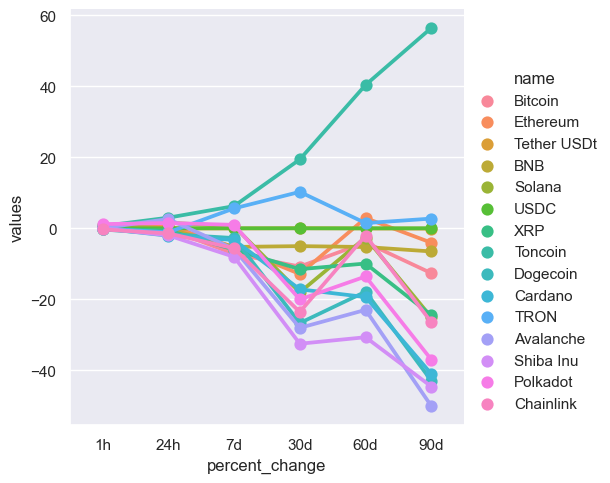

In [109]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [112]:
# we are going to create a dataframe with the columns we want

df10 = df72[['name','quote.USD.price','timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,61110.99647,2024-06-27 16:22:28.316414
1,Ethereum,3395.10145,2024-06-27 16:22:28.316414
2,Tether USDt,0.99907,2024-06-27 16:22:28.316414
3,BNB,572.08989,2024-06-27 16:22:28.316414
4,Solana,138.54977,2024-06-27 16:22:28.316414
5,USDC,0.99983,2024-06-27 16:22:28.316414
6,XRP,0.46852,2024-06-27 16:22:28.316414
7,Toncoin,7.68326,2024-06-27 16:22:28.316414
8,Dogecoin,0.12246,2024-06-27 16:22:28.316414
9,Cardano,0.37976,2024-06-27 16:22:28.316414


In [91]:
# now if only want to look at bitcoin
df10 = df72[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,61110.99647,2024-06-27 16:22:28.316414
15,Bitcoin,61110.99647,2024-06-27 16:23:00.048608
30,Bitcoin,61091.41141,2024-06-27 16:23:31.195056
45,Bitcoin,61091.41141,2024-06-27 16:24:02.381842
60,Bitcoin,61093.55444,2024-06-27 16:24:33.798677
